### Steps:

1) Import the Libraries
2) Load the data
3) Visualizing the shape of train and test data
4) Normalization of data
5) Visualization of image
6) Create the Convolution Model
7) Add the Convolution Layer
8) Add the MaxPooling Layer
9) Add the Flatten Layer
10) Add the Dense Layer
11) Compile the Model
12) Train the Model
13) Visualizing the Accuracy of Model
14) Prediction on Test data

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.callbacks import callbacks
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [8]:
train = pd.read_csv('mnist_train.csv.zip', compression='infer')
test = pd.read_csv('mnist_test.csv.zip', compression='infer')

print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train = train.drop(['label'], axis = 1).to_numpy().reshape(42000, 28, 28, 1).astype('float32')
x_train /= 255.
y_train = tf.keras.utils.to_categorical(train['label'], num_classes=10)

x_test = test.to_numpy().reshape(28000, 28, 28, 1).astype('float32')
x_test /= 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 28, 28, 1)
(42000, 10)
(28000, 28, 28, 1)


Output = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


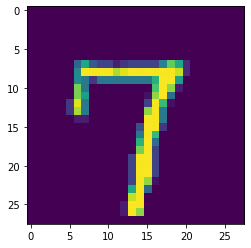

In [15]:
g = plt.imshow(x_train[6,:,:,0])
print("Output = " +str(y_train[6,:]))

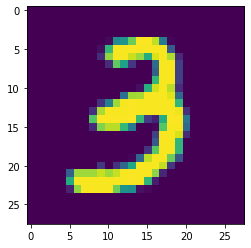

In [17]:
g = plt.imshow(x_test[7,:,:,0])

In [19]:
# Create the Convolution Model
# Add the Convolution Layer
# Add the MaxPooling Layer

model =  models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size =(3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters = 64, kernel_size =(3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))                            
model.add(layers.Conv2D(filters = 64, kernel_size =(3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

In [21]:
# Add the Flatten Layer
# Add the Dense Layer

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

In [22]:
# compile the Model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
class EarlyStoppingAtMinLoss(tf.keras.callbacks.Callback):
  """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

  def __init__(self, patience=0):
    super(EarlyStoppingAtMinLoss, self).__init__()

    self.patience = patience

    # best_weights to store the weights at which the minimum loss occurs.
    self.best_weights = None

  def on_train_begin(self, logs=None):
    # The number of epoch it has waited when loss is no longer minimum.
    self.wait = 0
    # The epoch the training stops at.
    self.stopped_epoch = 0
    # Initialize the best as infinity.
    self.best = np.Inf

  def on_epoch_end(self, epoch, logs=None):
    current = logs.get('loss')
    if np.less(current, self.best):
      self.best = current
      self.wait = 0
      # Record the best weights if current results is better (less).
      self.best_weights = self.model.get_weights()
    else:
      self.wait += 1
      if self.wait >= self.patience:
        self.stopped_epoch = epoch
        self.model.stop_training = True
        print('Restoring model weights from the end of the best epoch.')
        self.model.set_weights(self.best_weights)

  def on_train_end(self, logs=None):
    if self.stopped_epoch > 0:
      print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))

In [24]:
from sklearn.model_selection import train_test_split
x_t, x_v, y_t, y_v = train_test_split(x_train, y_train, test_size=0.2,random_state = 42)

print(x_t.shape)
print(x_v.shape)
print(y_t.shape)
print(y_v.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [27]:
history = model.fit(x_t, y_t,validation_data=(x_v, y_v), epochs=15, callbacks = [EarlyStoppingAtMinLoss()])

Train on 33600 samples, validate on 8400 samples
Epoch 1/15
33600/33600 [==============================] - 25s 750us/sample - loss: 1.2271 - accuracy: 0.4808 - val_loss: 0.5483 - val_accuracy: 0.8181
Epoch 2/15
33600/33600 [==============================] - 25s 742us/sample - loss: 0.4296 - accuracy: 0.8638 - val_loss: 0.1758 - val_accuracy: 0.9696
Epoch 3/15
33600/33600 [==============================] - 28s 822us/sample - loss: 0.2113 - accuracy: 0.9562 - val_loss: 0.1091 - val_accuracy: 0.9765
Epoch 4/15
33600/33600 [==============================] - 26s 766us/sample - loss: 0.1674 - accuracy: 0.9637 - val_loss: 0.0986 - val_accuracy: 0.9782
Epoch 5/15
33600/33600 [==============================] - 25s 747us/sample - loss: 0.1367 - accuracy: 0.9713 - val_loss: 0.0732 - val_accuracy: 0.9844
Epoch 6/15
33600/33600 [==============================] - 27s 794us/sample - loss: 0.1202 - accuracy: 0.9741 - val_loss: 0.0706 - val_accuracy: 0.9856
Epoch 7/15
33600/33600 [=====================

In [28]:
# validating the accuracy of the model

result = model.predict(x_v)

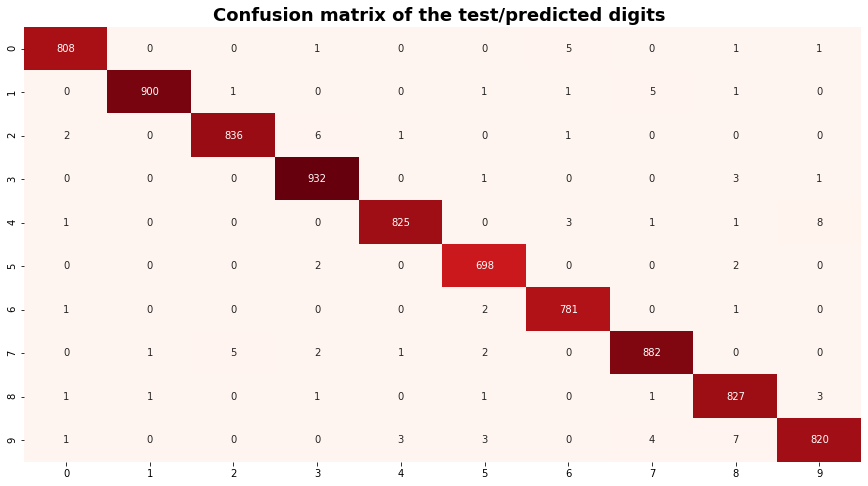

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_class = np.argmax(result, axis = 1) 

y_check = np.argmax(y_v, axis = 1) 

cmatrix = confusion_matrix(y_check, y_class)

plt.figure(figsize=(15,8))
plt.title('Confusion matrix of the test/predicted digits ', weight='bold', fontsize=18)
sns.heatmap(cmatrix,annot=True,cmap="Reds",fmt="d",cbar=False)

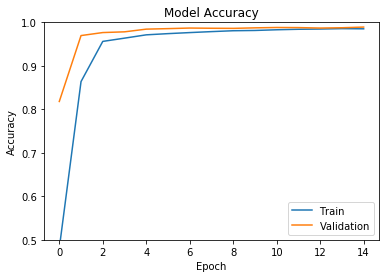

In [33]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

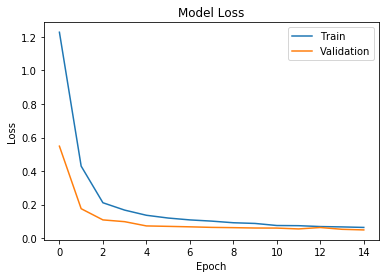

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Output = 3


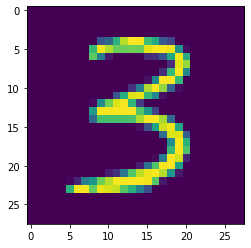

In [35]:
y_predict = model.predict_classes(x_test, verbose=0)
m = plt.imshow(x_test[9,:,:,0])
print("Output = " +str(y_predict[9]))

In [36]:
# submissions=pd.DataFrame({"ImageId": list(range(1,len(y_predict)+1)),
#                          "Label": y_predict})
# submissions.to_csv("sub.csv", index=False, header=True)